In [1]:
import pandas as pd
print(pd.__version__)

2.2.3


All CSV files contain valid data.


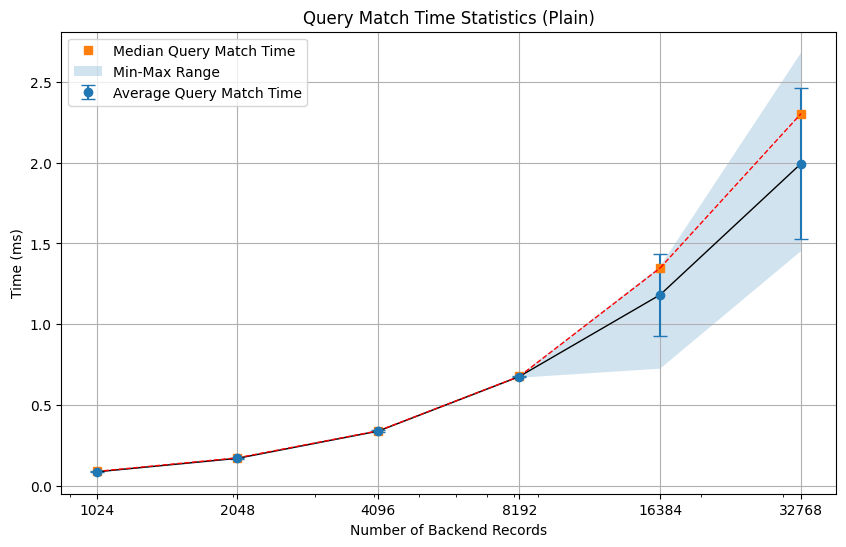

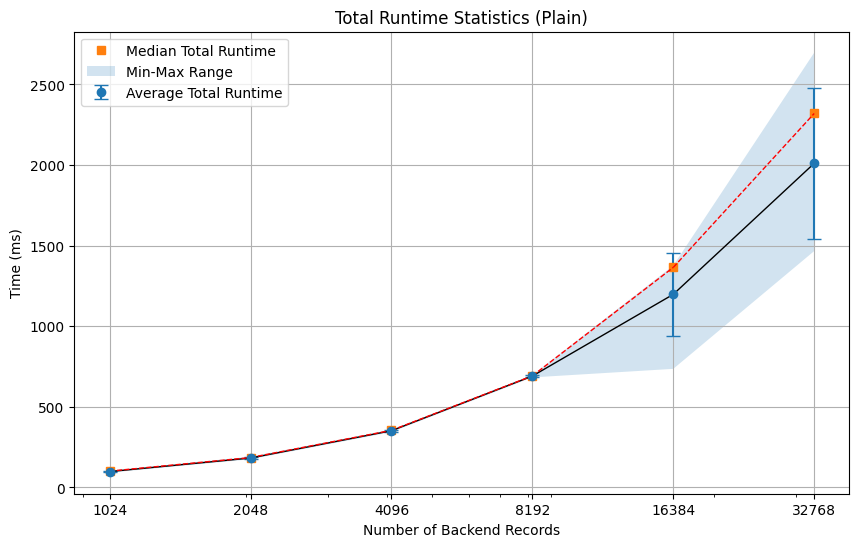

In [9]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Set the directory where your CSV files are located.
csv_dir = "/Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_facial_recognition/data/"
csv_pattern = csv_dir + "plain_run_*.csv"

# Get a sorted list of CSV files matching the pattern
csv_files = sorted(glob.glob(csv_pattern))

# Check for empty or malformed CSV files
empty_files = []
valid_files = []

for file in csv_files:
    try:
        df = pd.read_csv(file)
        if df.empty:
            empty_files.append(file)
        else:
            valid_files.append(file)
    except Exception as e:
        print(f"Error reading {file}: {e}")
        empty_files.append(file)

if empty_files:
    print("Warning: The following CSV files are empty or have issues:")
    for f in empty_files:
        print(f" - {f}")
else:
    print("All CSV files contain valid data.")

# Initialize lists to store the actual number of backend records and computed statistics
num_records = []  # This will store 2^(extracted exponent)

# For query_match_time statistics:
query_avg    = []
query_min    = []
query_max    = []
query_std    = []
query_median = []

# For total_runtime(ms) statistics:
total_avg    = []
total_min    = []
total_max    = []
total_std    = []
total_median = []

# Process each valid CSV file
for file in valid_files:
    df = pd.read_csv(file)
    
    # Ensure the required columns exist.
    # Note: The CSVs should have "query_match_time" and "total_runtime(ms)" columns.
    required_columns = {"query_match_time", "total_runtime(ms)"}
    if not required_columns.issubset(df.columns):
        print(f"Skipping {file} - Missing required columns.")
        continue

    # Extract the exponent from the filename.
    # For example, "plain_run_10.csv" gives exponent 10, so actual records = 2**10 = 1024.
    try:
        exponent = int(file.split("_")[-1].split(".")[0])
        records = 2 ** exponent
        num_records.append(records)
    except ValueError:
        print(f"Skipping {file} - Could not extract record number.")
        continue

    # Compute statistics for query_match_time (all times in ms)
    qtime = df["query_match_time"]
    query_avg.append(qtime.mean())
    query_min.append(qtime.min())
    query_max.append(qtime.max())
    query_std.append(qtime.std())
    query_median.append(qtime.median())

    # Compute statistics for total_runtime(ms)
    truntime = df["total_runtime(ms)"]
    total_avg.append(truntime.mean())
    total_min.append(truntime.min())
    total_max.append(truntime.max())
    total_std.append(truntime.std())
    total_median.append(truntime.median())

sorted_data = sorted(zip(num_records, query_avg, query_min, query_max, query_std, query_median,
                           total_avg, total_min, total_max, total_std, total_median), key=lambda x: x[0])
(num_records, 
 query_avg, query_min, query_max, query_std, query_median, 
 total_avg, total_min, total_max, total_std, total_median) = map(list, zip(*sorted_data))

# Define x-axis ticks exactly as the actual record counts (e.g., 1024, 2048, ..., 32768)
xticks = num_records

# ----------------------------
# Plot Query Match Time Statistics
# ----------------------------
plt.figure(figsize=(10, 6))

# Plot average query_match_time with error bars (std)
plt.errorbar(num_records, query_avg, yerr=query_std, fmt='o', capsize=5,
             label='Average Query Match Time')

# Plot median values as markers (without connecting lines)
plt.plot(num_records, query_median, 's', label='Median Query Match Time')

# Draw line segments connecting each pair of adjacent points.
for i in range(len(num_records) - 1):
    # Connect average values with a solid line
    plt.plot(num_records[i:i+2], query_avg[i:i+2], 'k-', lw=1)
    # Optionally, also connect the median markers with a dashed line:
    plt.plot(num_records[i:i+2], query_median[i:i+2], 'r--', lw=1)

# Shade the area between the minimum and maximum values
plt.fill_between(num_records, query_min, query_max, alpha=0.2,
                 label='Min-Max Range')

plt.xscale('log')
plt.xticks(xticks, xticks)
plt.xlabel('Number of Backend Records')
plt.ylabel('Time (ms)')
plt.title('Query Match Time Statistics (Plain)')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Plot Total Runtime Statistics
# ----------------------------
plt.figure(figsize=(10, 6))

# Plot average total runtime with error bars
plt.errorbar(num_records, total_avg, yerr=total_std, fmt='o', capsize=5,
             label='Average Total Runtime')

# Plot median total runtime as markers
plt.plot(num_records, total_median, 's', label='Median Total Runtime')

# Draw line segments connecting adjacent points
for i in range(len(num_records) - 1):
    plt.plot(num_records[i:i+2], total_avg[i:i+2], 'k-', lw=1)
    plt.plot(num_records[i:i+2], total_median[i:i+2], 'r--', lw=1)

# Shade the area between the minimum and maximum values
plt.fill_between(num_records, total_min, total_max, alpha=0.2,
                 label='Min-Max Range')

plt.xscale('log')
plt.xticks(xticks, xticks)
plt.xlabel('Number of Backend Records')
plt.ylabel('Time (ms)')
plt.title('Total Runtime Statistics (Plain)')
plt.legend()
plt.grid(True)
plt.show()


All CSV files contain valid data.


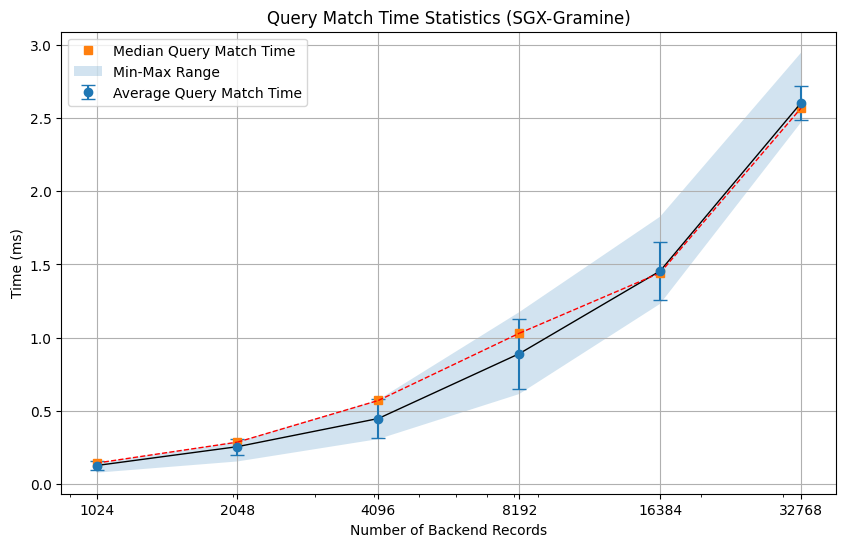

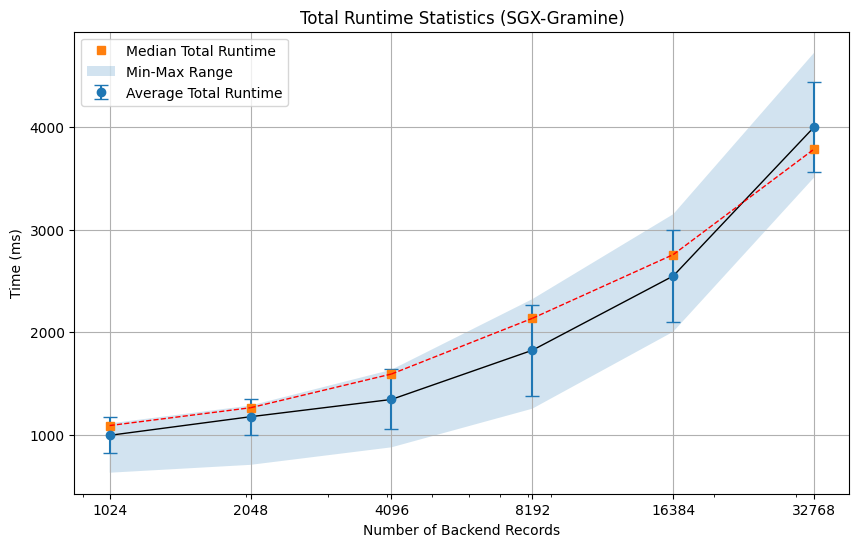

In [10]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Set the directory where your CSV files are located.
csv_dir = "/Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_facial_recognition/data/sgx/"
csv_pattern = csv_dir + "sgx_run_*.csv"

# Get a sorted list of CSV files matching the pattern
csv_files = sorted(glob.glob(csv_pattern))

# Check for empty or malformed CSV files
empty_files = []
valid_files = []

for file in csv_files:
    try:
        df = pd.read_csv(file)
        if df.empty:
            empty_files.append(file)
        else:
            valid_files.append(file)
    except Exception as e:
        print(f"Error reading {file}: {e}")
        empty_files.append(file)

if empty_files:
    print("Warning: The following CSV files are empty or have issues:")
    for f in empty_files:
        print(f" - {f}")
else:
    print("All CSV files contain valid data.")

# Initialize lists to store the actual number of backend records and computed statistics
num_records = []  # This will store 2^(extracted exponent)

# For query_match_time statistics:
query_avg    = []
query_min    = []
query_max    = []
query_std    = []
query_median = []

# For total_runtime(ms) statistics:
total_avg    = []
total_min    = []
total_max    = []
total_std    = []
total_median = []

# Process each valid CSV file
for file in valid_files:
    df = pd.read_csv(file)
    
    # Ensure the required columns exist.
    # Note: The CSVs should have "query_match_time" and "total_runtime(ms)" columns.
    required_columns = {"query_match_time", "total_runtime(ms)"}
    if not required_columns.issubset(df.columns):
        print(f"Skipping {file} - Missing required columns.")
        continue

    # Extract the exponent from the filename.
    # For example, "plain_run_10.csv" gives exponent 10, so actual records = 2**10 = 1024.
    try:
        exponent = int(file.split("_")[-1].split(".")[0])
        records = 2 ** exponent
        num_records.append(records)
    except ValueError:
        print(f"Skipping {file} - Could not extract record number.")
        continue

    # Compute statistics for query_match_time (all times in ms)
    qtime = df["query_match_time"]
    query_avg.append(qtime.mean())
    query_min.append(qtime.min())
    query_max.append(qtime.max())
    query_std.append(qtime.std())
    query_median.append(qtime.median())

    # Compute statistics for total_runtime(ms)
    truntime = df["total_runtime(ms)"]
    total_avg.append(truntime.mean())
    total_min.append(truntime.min())
    total_max.append(truntime.max())
    total_std.append(truntime.std())
    total_median.append(truntime.median())

# If desired, sort all lists by num_records so that the trend is clear.
sorted_data = sorted(zip(num_records, query_avg, query_min, query_max, query_std, query_median,
                           total_avg, total_min, total_max, total_std, total_median), key=lambda x: x[0])
(num_records, 
 query_avg, query_min, query_max, query_std, query_median, 
 total_avg, total_min, total_max, total_std, total_median) = map(list, zip(*sorted_data))

# Define x-axis ticks exactly as the actual record counts (e.g., 1024, 2048, ..., 32768)
xticks = num_records

# ----------------------------
# Plot Query Match Time Statistics
# ----------------------------
plt.figure(figsize=(10, 6))

# Plot average query_match_time with error bars (std)
plt.errorbar(num_records, query_avg, yerr=query_std, fmt='o', capsize=5,
             label='Average Query Match Time')

# Plot median values as markers (without connecting lines)
plt.plot(num_records, query_median, 's', label='Median Query Match Time')

# Draw line segments connecting each pair of adjacent points.
for i in range(len(num_records) - 1):
    # Connect average values with a solid line
    plt.plot(num_records[i:i+2], query_avg[i:i+2], 'k-', lw=1)
    # Optionally, also connect the median markers with a dashed line:
    plt.plot(num_records[i:i+2], query_median[i:i+2], 'r--', lw=1)

# Shade the area between the minimum and maximum values
plt.fill_between(num_records, query_min, query_max, alpha=0.2,
                 label='Min-Max Range')

plt.xscale('log')
plt.xticks(xticks, xticks)
plt.xlabel('Number of Backend Records')
plt.ylabel('Time (ms)')
plt.title('Query Match Time Statistics (SGX-Gramine)')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Plot Total Runtime Statistics
# ----------------------------
plt.figure(figsize=(10, 6))

# Plot average total runtime with error bars
plt.errorbar(num_records, total_avg, yerr=total_std, fmt='o', capsize=5,
             label='Average Total Runtime')

# Plot median total runtime as markers
plt.plot(num_records, total_median, 's', label='Median Total Runtime')

# Draw line segments connecting adjacent points
for i in range(len(num_records) - 1):
    plt.plot(num_records[i:i+2], total_avg[i:i+2], 'k-', lw=1)
    plt.plot(num_records[i:i+2], total_median[i:i+2], 'r--', lw=1)

# Shade the area between the minimum and maximum values
plt.fill_between(num_records, total_min, total_max, alpha=0.2,
                 label='Min-Max Range')

plt.xscale('log')
plt.xticks(xticks, xticks)
plt.xlabel('Number of Backend Records')
plt.ylabel('Time (ms)')
plt.title('Total Runtime Statistics (SGX-Gramine)')
plt.legend()
plt.grid(True)
plt.show()


All CSV files in /Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_facial_recognition/data/ contain valid data.
All CSV files in /Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_facial_recognition/data/sgx/ contain valid data.


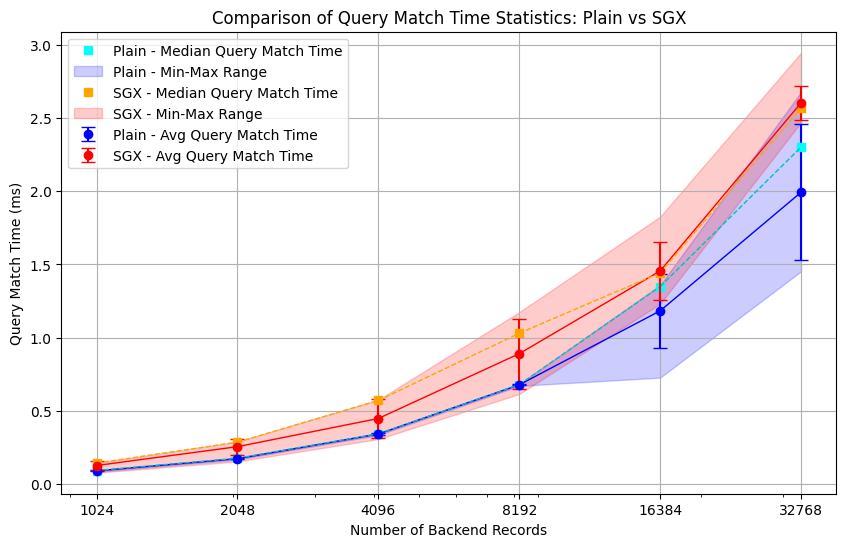

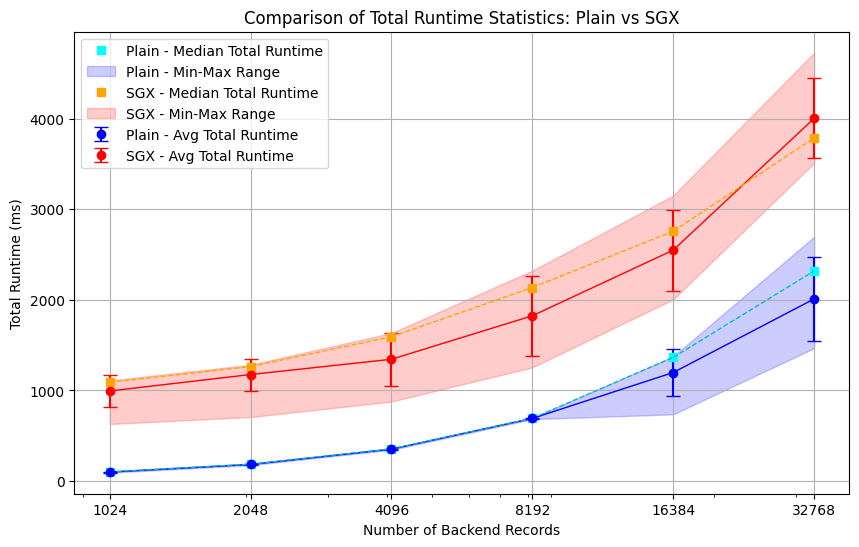

In [11]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

def load_data(csv_dir, pattern="plain_run_*.csv"):
    """
    Loads CSV files from the specified directory matching the pattern and computes summary 
    statistics for query_match_time and total_runtime(ms).

    Each CSV file is expected to have the columns:
      - query_match_time
      - total_runtime(ms)

    The file name is assumed to be of the form "plain_run_<exponent>.csv" so that the 
    actual number of backend records = 2^(exponent).

    Returns a dictionary with keys:
      - num_records: list of record counts (actual values: 2^exponent)
      - query_avg, query_min, query_max, query_std, query_median
      - total_avg, total_min, total_max, total_std, total_median
    """
    csv_pattern = csv_dir + pattern
    csv_files = sorted(glob.glob(csv_pattern))
    
    # Check for empty or malformed CSV files
    empty_files = []
    valid_files = []
    for file in csv_files:
        try:
            df = pd.read_csv(file)
            if df.empty:
                empty_files.append(file)
            else:
                valid_files.append(file)
        except Exception as e:
            print(f"Error reading {file}: {e}")
            empty_files.append(file)
    
    if empty_files:
        print("Warning: The following CSV files are empty or have issues:")
        for f in empty_files:
            print(" -", f)
    else:
        print("All CSV files in", csv_dir, "contain valid data.")
    
    # Initialize lists for computed statistics
    num_records = []   # Actual backend record count = 2^(exponent)
    
    # Query match time stats
    query_avg    = []
    query_min    = []
    query_max    = []
    query_std    = []
    query_median = []
    
    # Total runtime stats
    total_avg    = []
    total_min    = []
    total_max    = []
    total_std    = []
    total_median = []
    
    # Process each valid CSV file
    for file in valid_files:
        df = pd.read_csv(file)
        
        # Ensure required columns exist
        required_columns = {"query_match_time", "total_runtime(ms)"}
        if not required_columns.issubset(df.columns):
            print(f"Skipping {file} - Missing required columns.")
            continue
        
        # Extract exponent from the filename (e.g. plain_run_10.csv → exponent=10 → 2^10 = 1024)
        try:
            exponent = int(file.split("_")[-1].split(".")[0])
            records = 2 ** exponent
            num_records.append(records)
        except ValueError:
            print(f"Skipping {file} - Could not extract record number.")
            continue
        
        # Compute query_match_time statistics
        qtime = df["query_match_time"]
        query_avg.append(qtime.mean())
        query_min.append(qtime.min())
        query_max.append(qtime.max())
        query_std.append(qtime.std())
        query_median.append(qtime.median())
        
        # Compute total_runtime(ms) statistics
        truntime = df["total_runtime(ms)"]
        total_avg.append(truntime.mean())
        total_min.append(truntime.min())
        total_max.append(truntime.max())
        total_std.append(truntime.std())
        total_median.append(truntime.median())
    
    # Sort all lists by num_records (in case the files are not already in order)
    sorted_data = sorted(zip(num_records, query_avg, query_min, query_max, query_std, query_median,
                               total_avg, total_min, total_max, total_std, total_median), key=lambda x: x[0])
    
    (num_records, query_avg, query_min, query_max, query_std, query_median,
     total_avg, total_min, total_max, total_std, total_median) = map(list, zip(*sorted_data))
    
    return {
        "num_records": num_records,
        "query_avg": query_avg,
        "query_min": query_min,
        "query_max": query_max,
        "query_std": query_std,
        "query_median": query_median,
        "total_avg": total_avg,
        "total_min": total_min,
        "total_max": total_max,
        "total_std": total_std,
        "total_median": total_median
    }

# ----------------------------
# Directories for Plain and SGX CSV files
# ----------------------------
plain_dir = "/Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_facial_recognition/data/"
sgx_dir   = "/Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_facial_recognition/data/sgx/"

# Load data for both plain and SGX cases.
# (Adjust the file pattern if your SGX CSV files have a different naming convention.)
plain_data = load_data(plain_dir, pattern="plain_run_*.csv")
sgx_data   = load_data(sgx_dir, pattern="sgx_run_*.csv")

# Define common x-axis ticks based on the record counts present in the data
all_records = sorted(list(set(plain_data["num_records"] + sgx_data["num_records"])))

# ----------------------------
# Plot 1: Compare Query Match Time (Plain vs SGX)
# ----------------------------
plt.figure(figsize=(10, 6))

# Plot Plain data for query_match_time
plt.errorbar(plain_data["num_records"], plain_data["query_avg"], yerr=plain_data["query_std"],
             fmt='o', capsize=5, label='Plain - Avg Query Match Time', color='blue')
plt.plot(plain_data["num_records"], plain_data["query_median"], 's', 
         label='Plain - Median Query Match Time', color='cyan')
for i in range(len(plain_data["num_records"]) - 1):
    plt.plot(plain_data["num_records"][i:i+2], plain_data["query_avg"][i:i+2], 'b-', lw=1)
    plt.plot(plain_data["num_records"][i:i+2], plain_data["query_median"][i:i+2], 'c--', lw=1)
plt.fill_between(plain_data["num_records"], plain_data["query_min"], plain_data["query_max"],
                 color='blue', alpha=0.2, label='Plain - Min-Max Range')

# Plot SGX data for query_match_time
plt.errorbar(sgx_data["num_records"], sgx_data["query_avg"], yerr=sgx_data["query_std"],
             fmt='o', capsize=5, label='SGX - Avg Query Match Time', color='red')
plt.plot(sgx_data["num_records"], sgx_data["query_median"], 's', 
         label='SGX - Median Query Match Time', color='orange')
for i in range(len(sgx_data["num_records"]) - 1):
    plt.plot(sgx_data["num_records"][i:i+2], sgx_data["query_avg"][i:i+2], 'r-', lw=1)
    plt.plot(sgx_data["num_records"][i:i+2], sgx_data["query_median"][i:i+2],
             color='orange', linestyle='--', lw=1)
plt.fill_between(sgx_data["num_records"], sgx_data["query_min"], sgx_data["query_max"],
                 color='red', alpha=0.2, label='SGX - Min-Max Range')

plt.xscale('log')
plt.xticks(all_records, all_records)
plt.xlabel('Number of Backend Records')
plt.ylabel('Query Match Time (ms)')
plt.title('Comparison of Query Match Time Statistics: Plain vs SGX')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Plot 2: Compare Total Runtime (Plain vs SGX)
# ----------------------------
plt.figure(figsize=(10, 6))

# Plot Plain data for total_runtime(ms)
plt.errorbar(plain_data["num_records"], plain_data["total_avg"], yerr=plain_data["total_std"],
             fmt='o', capsize=5, label='Plain - Avg Total Runtime', color='blue')
plt.plot(plain_data["num_records"], plain_data["total_median"], 's',
         label='Plain - Median Total Runtime', color='cyan')
for i in range(len(plain_data["num_records"]) - 1):
    plt.plot(plain_data["num_records"][i:i+2], plain_data["total_avg"][i:i+2], 'b-', lw=1)
    plt.plot(plain_data["num_records"][i:i+2], plain_data["total_median"][i:i+2], 'c--', lw=1)
plt.fill_between(plain_data["num_records"], plain_data["total_min"], plain_data["total_max"],
                 color='blue', alpha=0.2, label='Plain - Min-Max Range')

# Plot SGX data for total_runtime(ms)
plt.errorbar(sgx_data["num_records"], sgx_data["total_avg"], yerr=sgx_data["total_std"],
             fmt='o', capsize=5, label='SGX - Avg Total Runtime', color='red')
plt.plot(sgx_data["num_records"], sgx_data["total_median"], 's',
         label='SGX - Median Total Runtime', color='orange')
for i in range(len(sgx_data["num_records"]) - 1):
    plt.plot(sgx_data["num_records"][i:i+2], sgx_data["total_avg"][i:i+2], 'r-', lw=1)
    plt.plot(sgx_data["num_records"][i:i+2], sgx_data["total_median"][i:i+2],
             color='orange', linestyle='--', lw=1)
plt.fill_between(sgx_data["num_records"], sgx_data["total_min"], sgx_data["total_max"],
                 color='red', alpha=0.2, label='SGX - Min-Max Range')

plt.xscale('log')
plt.xticks(all_records, all_records)
plt.xlabel('Number of Backend Records')
plt.ylabel('Total Runtime (ms)')
plt.title('Comparison of Total Runtime Statistics: Plain vs SGX')
plt.legend()
plt.grid(True)
plt.show()


All CSV files in /Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_facial_recognition/data/ contain valid data.
All CSV files in /Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_facial_recognition/data/sgx/ contain valid data.


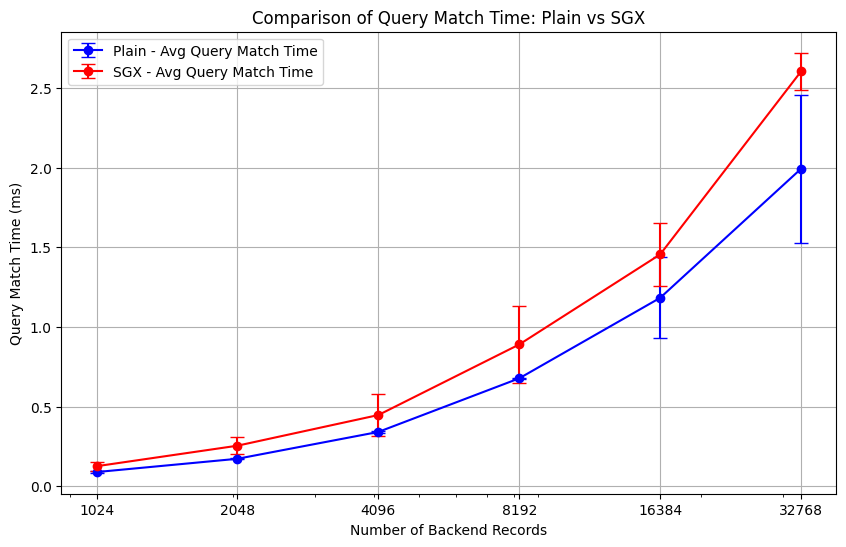

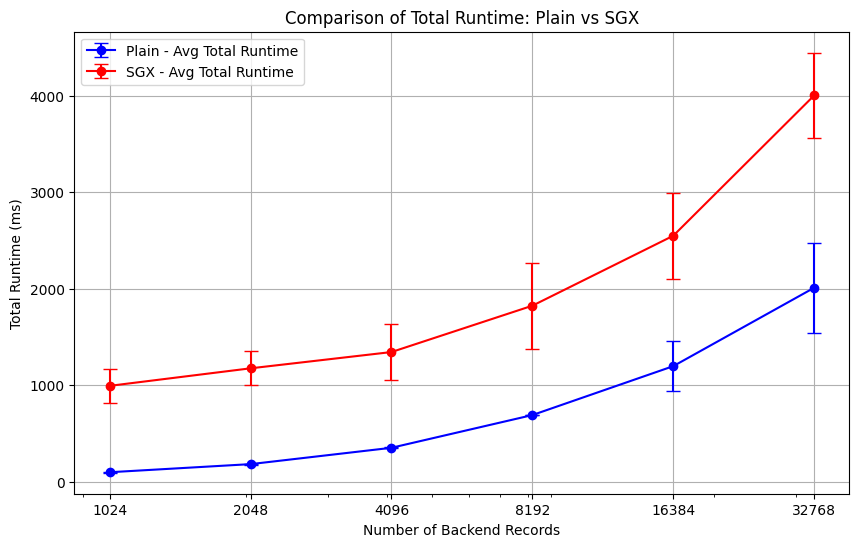

In [12]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

def load_data(csv_dir, pattern="plain_run_*.csv"):
    """
    Loads CSV files from the specified directory matching the pattern and computes summary 
    statistics for query_match_time and total_runtime(ms).

    Each CSV file is expected to have the columns:
      - query_match_time
      - total_runtime(ms)

    The file name is assumed to be of the form "plain_run_<exponent>.csv" so that the 
    actual number of backend records = 2^(exponent).

    Returns a dictionary with keys:
      - num_records: list of record counts (actual values: 2^exponent)
      - query_avg, query_std
      - total_avg, total_std
    """
    csv_pattern = csv_dir + pattern
    csv_files = sorted(glob.glob(csv_pattern))
    
    # Check for empty or malformed CSV files
    empty_files = []
    valid_files = []
    for file in csv_files:
        try:
            df = pd.read_csv(file)
            if df.empty:
                empty_files.append(file)
            else:
                valid_files.append(file)
        except Exception as e:
            print(f"Error reading {file}: {e}")
            empty_files.append(file)
    
    if empty_files:
        print("Warning: The following CSV files are empty or have issues:")
        for f in empty_files:
            print(" -", f)
    else:
        print("All CSV files in", csv_dir, "contain valid data.")
    
    # Initialize lists for computed statistics
    num_records = []   # Actual backend record count = 2^(exponent)
    
    # Query match time stats
    query_avg    = []
    query_std    = []
    
    # Total runtime stats
    total_avg    = []
    total_std    = []
    
    # Process each valid CSV file
    for file in valid_files:
        df = pd.read_csv(file)
        
        # Ensure required columns exist
        required_columns = {"query_match_time", "total_runtime(ms)"}
        if not required_columns.issubset(df.columns):
            print(f"Skipping {file} - Missing required columns.")
            continue
        
        # Extract exponent from the filename (e.g. plain_run_10.csv → exponent=10 → 2^10 = 1024)
        try:
            exponent = int(file.split("_")[-1].split(".")[0])
            records = 2 ** exponent
            num_records.append(records)
        except ValueError:
            print(f"Skipping {file} - Could not extract record number.")
            continue
        
        # Compute query_match_time statistics
        qtime = df["query_match_time"]
        query_avg.append(qtime.mean())
        query_std.append(qtime.std())
        
        # Compute total_runtime(ms) statistics
        truntime = df["total_runtime(ms)"]
        total_avg.append(truntime.mean())
        total_std.append(truntime.std())
    
    # Sort all lists by num_records (in case the files are not already in order)
    sorted_data = sorted(zip(num_records, query_avg, query_std, total_avg, total_std), key=lambda x: x[0])
    (num_records, query_avg, query_std, total_avg, total_std) = map(list, zip(*sorted_data))
    
    return {
        "num_records": num_records,
        "query_avg": query_avg,
        "query_std": query_std,
        "total_avg": total_avg,
        "total_std": total_std
    }

# ----------------------------
# Directories for Plain and SGX CSV files
# ----------------------------
plain_dir = "/Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_facial_recognition/data/"
sgx_dir   = "/Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_facial_recognition/data/sgx/"

# Load data for both plain and SGX cases.
plain_data = load_data(plain_dir, pattern="plain_run_*.csv")
sgx_data   = load_data(sgx_dir, pattern="sgx_run_*.csv")

# Define common x-axis ticks based on the record counts present in the data
all_records = sorted(list(set(plain_data["num_records"] + sgx_data["num_records"])))

# ----------------------------
# Plot 1: Compare Query Match Time (Plain vs SGX)
# ----------------------------
plt.figure(figsize=(10, 6))

# Plot Plain data: Average query_match_time with error bars (using a line marker)
plt.errorbar(plain_data["num_records"], plain_data["query_avg"], yerr=plain_data["query_std"],
             fmt='-o', capsize=5, label='Plain - Avg Query Match Time', color='blue')

# Plot SGX data: Average query_match_time with error bars
plt.errorbar(sgx_data["num_records"], sgx_data["query_avg"], yerr=sgx_data["query_std"],
             fmt='-o', capsize=5, label='SGX - Avg Query Match Time', color='red')

plt.xscale('log')
plt.xticks(all_records, all_records)
plt.xlabel('Number of Backend Records')
plt.ylabel('Query Match Time (ms)')
plt.title('Comparison of Query Match Time: Plain vs SGX')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Plot 2: Compare Total Runtime (Plain vs SGX)
# ----------------------------
plt.figure(figsize=(10, 6))

# Plot Plain data: Average total_runtime(ms) with error bars
plt.errorbar(plain_data["num_records"], plain_data["total_avg"], yerr=plain_data["total_std"],
             fmt='-o', capsize=5, label='Plain - Avg Total Runtime', color='blue')

# Plot SGX data: Average total_runtime(ms) with error bars
plt.errorbar(sgx_data["num_records"], sgx_data["total_avg"], yerr=sgx_data["total_std"],
             fmt='-o', capsize=5, label='SGX - Avg Total Runtime', color='red')

plt.xscale('log')
plt.xticks(all_records, all_records)
plt.xlabel('Number of Backend Records')
plt.ylabel('Total Runtime (ms)')
plt.title('Comparison of Total Runtime: Plain vs SGX')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import pandas as pd

# Load the data
data = {
    "ciphertext_size": [512] * 50,
    "encrypt_time": [0.010761, 0.008769, 0.005634, 0.005577, 0.005984, 0.006005, 0.011091, 0.006676, 
                     0.006091, 0.005833, 0.005833, 0.005538, 0.00551, 0.011285, 0.008285, 0.011007, 
                     0.006089, 0.005229, 0.008282, 0.008001, 0.005556, 0.010057, 0.007607, 0.009491, 
                     0.005834, 0.008786, 0.01079, 0.008269, 0.009007, 0.005918, 0.008244, 0.007905, 
                     0.009253, 0.006754, 0.008103, 0.009197, 0.00768, 0.005621, 0.01026, 0.005704, 
                     0.006094, 0.008231, 0.007983, 0.013368, 0.005928, 0.005733, 0.005804, 0.00572, 
                     0.010052, 0.007951],
    "total_execution_time": [11, 10, 8, 8, 9, 9, 9, 9, 9, 8, 8, 8, 9, 9, 9, 12, 8, 8, 9, 8, 8, 9, 8, 9, 
                              8, 9, 9, 9, 9, 8, 9, 8, 9, 8, 9, 9, 8, 9, 9, 8, 9, 8, 9, 11, 8, 9, 8, 8, 
                              9, 8]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate averages
avg_encryption_time = df["encrypt_time"].mean()
avg_total_execution_time = df["total_execution_time"].mean()

# Ciphertext size (should be constant)
ciphertext_size_q = df["ciphertext_size"].iloc[0]

# Print the summary table
summary = f"""
==================================================
      Encryption Time Summary (receiver end -> )      
==================================================
 Encrypted Query Ciphertext Size (bytes): {ciphertext_size_q}
 Avg. Encryption Time (ms): {round(avg_encryption_time, 6)}
 Avg. Total Time (ms): {round(avg_total_execution_time, 6)}
==================================================
"""

print(summary)



      Encryption Time Summary (receiver end -> )      
 Encrypted Query Ciphertext Size (bytes): 512
 Avg. Encryption Time (ms): 0.007688
 Avg. Total Time (ms): 8.74



In [ ]:
# Encrypted result ciphertext size (bytes) = 4 + 4 * (Num_of_matched_indices) + 1

In [17]:
decryption_time = 0.003384 

# Encrypted result ciphertext size (bytes)
ciphertext_size = 13

# Print the results
print("\n" + "="*75)
print("      Decryption Time Summary for 2 matched-indices (receiver end <- )      ")
print("="*75)
print(f" Encrypted Result Ciphertext Size (bytes): {ciphertext_size}")
print(f" Avg. Decryption Time (ms): {round(decryption_time, 6)}")
print("="*75)


      Decryption Time Summary for 2 matched-indices (receiver end <- )      
 Encrypted Result Ciphertext Size (bytes): 13
 Avg. Decryption Time (ms): 0.003384
